In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('Student_dataset1.csv')

In [3]:
data.shape

(44, 30)

In [4]:
data.head()

,Timestamp,Name(Optional),Age,Gender,Are you a Mount Carmel Student?,"Enter your combination (Eg : BCA, ECE, BA PyEE, BCOM Honors, etc.)",Year of joining,Year of completion,"Please enter your percentage for first semester,(please convert your cgpa into *percentage* and enter it!)",Please enter your percentage for previous semester(please convert your cgpa into percentage and enter it!),...,"On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Social Media]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Gaming]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Sleeping]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [TV/Streaming on laptop]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Snacking]",Do you listen to music while you are studying?,What were the difficulties faced while studying online?,Most Preferred days of learning?,"In a day , how much caffeine-related beverages do you consume?",The most comfortable mode of study
0,2022/03/25 11:24:16 AM GMT+5:30,Sandra,20,Female,No,PSEco,2020,2023,87.50,82.5,...,4,1,4,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline
1,2022/03/25 12:31:39 PM GMT+5:30,NaN,20,Female,No,BBA,2019,2022,80.01,89.0,...,4,3,5,3,2,No,Short Attention span,Tuesday,2,Online
2,2022/03/25 12:38:21 PM GMT+5:30,NaN,19,Female,No,PSEco,2020,2023,82.00,81.0,...,5,2,5,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid
3,2022/03/25 1:08:11 PM GMT+5:30,SG,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,...,4,1,4,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline
4,2022/03/25 5:42:38 PM GMT+5:30,NaN,23,Male,No,ME,2017,2021,78.00,83.0,...,3,4,4,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid


In [5]:
#to rename the columns
data.rename(columns={'Are you a Mount Carmel Student?': 'MCC_Student',
                   'Enter your combination (Eg : BCA, ECE, BA PyEE, BCOM Honors, etc.)': 'Combination',
                   'Year of joining':'Start_year',
                  'Year of completion':'End_year',
                    'Please enter your percentage for first semester,(please convert your cgpa into *percentage* and enter it!) ':'Perc_1',
                    'Please enter your percentage for previous semester(please convert your cgpa into percentage and enter it!) ':'Perc_prev',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Social Media]':'Distracted_social_media',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Gaming]':'Distracted_gaming',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Sleeping]':'Distracted_sleep',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [TV/Streaming on laptop]':'Distracted_streaming',
                     'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Snacking]':'Distracted_snacking',
                    'Do you listen to music while you are studying?':'Music',
                    'What were the difficulties faced while studying online?':'Difficulties',
                     'Most Preferred days of learning?':'Learn_days',
                     'In a day , how much caffeine-related beverages do you consume?':'Coffee_consumption',
                     'The most comfortable mode of study':'Preferred_studymode',    
                     'Average time you spend studying/course related work in a day?':'Avg_time_studying',
                     'How productive were you during online classes?':'Productivity',
                     'What were your resources for studying during covid?':'Resources',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Text Books]':'Utilitarian_textbooks',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Online documented resources ]':'Utilitarian_onlinedoc',
                     'How conducive was your home environment for online classes?':'Conducive_env',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Tutorial websites, Journals and news articles]':'Utilitarian_websites',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Youtube(Topic related videos)]':'Utilitarian_youtube',
                     "On a scale of 1-5 , 1 being the least, teacher's performance based on constructive teaching [Online]":"Teacher_online",
                     "On a scale of 1-5 , 1 being the least, teacher's performance based on constructive teaching [Offline]":"Teacher_offline"

                    },
          inplace=True, errors='raise')

In [6]:
data.head()

,Timestamp,Name(Optional),Age,Gender,MCC_Student,Combination,Start_year,End_year,Perc_1,Perc_prev,...,Distracted_social_media,Distracted_gaming,Distracted_sleep,Distracted_streaming,Distracted_snacking,Music,Difficulties,Learn_days,Coffee_consumption,Preferred_studymode
0,2022/03/25 11:24:16 AM GMT+5:30,Sandra,20,Female,No,PSEco,2020,2023,87.50,82.5,...,4,1,4,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline
1,2022/03/25 12:31:39 PM GMT+5:30,NaN,20,Female,No,BBA,2019,2022,80.01,89.0,...,4,3,5,3,2,No,Short Attention span,Tuesday,2,Online
2,2022/03/25 12:38:21 PM GMT+5:30,NaN,19,Female,No,PSEco,2020,2023,82.00,81.0,...,5,2,5,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid
3,2022/03/25 1:08:11 PM GMT+5:30,SG,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,...,4,1,4,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline
4,2022/03/25 5:42:38 PM GMT+5:30,NaN,23,Male,No,ME,2017,2021,78.00,83.0,...,3,4,4,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid


In [7]:
data['Learn_days'].value_counts()

Saturday;Sunday                                             5
Monday;Tuesday;Wednesday;Thursday;Friday                    5
Monday;Tuesday;Wednesday;Thursday                           4
Thursday                                                    2
Thursday;Friday                                             2
Monday;Tuesday;Wednesday                                    2
Saturday                                                    2
Monday                                                      2
Monday;Tuesday;Thursday;Saturday                            2
Monday;Wednesday;Friday                                     2
Wednesday;Thursday;Friday                                   1
Tuesday;Wednesday;Thursday                                  1
Friday;Saturday                                             1
Thursday;Friday;Saturday                                    1
Tuesday;Wednesday;Friday                                    1
Tuesday;Wednesday;Thursday;Friday                           1
Tuesday;

In [8]:
data['Learn_days']=data['Learn_days'].astype('category')

In [9]:
data['MCC_Student']=data['MCC_Student'].astype('category')

In [10]:
data['Combination']=data['Combination'].astype('category')

In [11]:
data['Resources']=data['Resources'].astype('category')

In [12]:
data['Music']=data['Music'].astype('category')

In [13]:
data['Difficulties']=data['Difficulties'].astype('category')

In [14]:
data['Gender']=data['Gender'].astype('category')

In [15]:
data['Preferred_studymode']=data['Preferred_studymode'].astype('category')

In [16]:
data=data.drop(columns=['Name(Optional)', 'Timestamp'])

In [17]:
data.dtypes

Age                           int64
Gender                     category
MCC_Student                category
Combination                category
Start_year                    int64
End_year                      int64
Perc_1                      float64
Perc_prev                   float64
Resources                  category
Avg_time_studying             int64
Productivity                  int64
Utilitarian_textbooks         int64
Utilitarian_onlinedoc         int64
Utilitarian_websites          int64
Utilitarian_youtube           int64
Teacher_online                int64
Teacher_offline               int64
Conducive_env                 int64
Distracted_social_media       int64
Distracted_gaming             int64
Distracted_sleep              int64
Distracted_streaming          int64
Distracted_snacking           int64
Music                      category
Difficulties               category
Learn_days                 category
Coffee_consumption            int64
Preferred_studymode        c

In [18]:
data['perc_mean']=data.apply(lambda x: (x['Perc_1']+x['Perc_prev'])/2,axis=1)

In [19]:
data['difference']=data.apply(lambda x: x['Perc_1']-x['Perc_prev'],axis=1)

In [20]:
data['inc/dec']=data.apply(lambda x: 1 if x['difference'] >= 0 else 0,axis=1)

In [21]:
data.head()

,Age,Gender,MCC_Student,Combination,Start_year,End_year,Perc_1,Perc_prev,Resources,Avg_time_studying,...,Distracted_streaming,Distracted_snacking,Music,Difficulties,Learn_days,Coffee_consumption,Preferred_studymode,perc_mean,difference,inc/dec
0,20,Female,No,PSEco,2020,2023,87.50,82.5,Laptops/PC,2,...,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline,85.000,5.00,1
1,20,Female,No,BBA,2019,2022,80.01,89.0,Text Books;Tablets/ipad;Laptops/PC;Mobile Phones,2,...,3,2,No,Short Attention span,Tuesday,2,Online,84.505,-8.99,0
2,19,Female,No,PSEco,2020,2023,82.00,81.0,Laptops/PC,1,...,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid,81.500,1.00,1
3,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,Laptops/PC;Mobile Phones,4,...,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline,76.800,-3.60,0
4,23,Male,No,ME,2017,2021,78.00,83.0,Laptops/PC,1,...,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid,80.500,-5.00,0


In [22]:
data.dtypes

Age                           int64
Gender                     category
MCC_Student                category
Combination                category
Start_year                    int64
End_year                      int64
Perc_1                      float64
Perc_prev                   float64
Resources                  category
Avg_time_studying             int64
Productivity                  int64
Utilitarian_textbooks         int64
Utilitarian_onlinedoc         int64
Utilitarian_websites          int64
Utilitarian_youtube           int64
Teacher_online                int64
Teacher_offline               int64
Conducive_env                 int64
Distracted_social_media       int64
Distracted_gaming             int64
Distracted_sleep              int64
Distracted_streaming          int64
Distracted_snacking           int64
Music                      category
Difficulties               category
Learn_days                 category
Coffee_consumption            int64
Preferred_studymode        c

In [23]:
data = pd.get_dummies(data)

In [24]:
x=data.drop(['perc_mean'], axis=1)
y=data['perc_mean']
x.shape, y.shape

((44, 93), (44,))

In [25]:
#importing Train_test_split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [26]:
#creating instance of linear regression
lr = LR(normalize = True)
#Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [27]:
#Predicting over the train set and calculating error
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean Error', k)

Training Mean Error 4.7880127786272554e-26


In [33]:
#Predicting over the test set and calculating error
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Mean Error', k)

Test Mean Error 27.942577128952838


In [29]:
#Parameters of Linear Regression
lr.coef_

array([  0.08474815,   0.4658343 ,  -0.61800417,   0.22852056,
         0.20857952,  -0.1334049 ,  -0.5064666 ,  -0.40636672,
        -0.21485322,   0.13036381,  -0.25768764,  -0.61051675,
         0.05794691,  -0.5543055 ,   0.14738743,  -0.68728185,
        -0.530624  ,  -0.12245793,  -0.2653913 ,  -0.31019736,
         0.01882306,   0.11597396,   0.63462944,  -0.63404976,
         1.81174492,  -1.81685588,   1.73242084,  -3.75727981,
         1.29000143,   1.28045289,   0.03879874,  -0.90704493,
         2.05277757,  -1.50457319,   0.        ,   0.91548064,
         1.24296513,  -5.56125786, -14.36438425,   0.        ,
         4.64640767,   0.        ,   0.96923417,   1.65990899,
        -0.1694019 ,   0.        ,   0.        ,  -1.46173239,
        -0.18462693,  -1.80153955,   1.65334459,   0.        ,
         0.        ,   0.47034845,  -1.53373832,   3.35226807,
        -0.47559053,   0.79052699,  -0.44373218,  -0.25589947,
         0.38543763,   0.52245831,  -0.47428871,   0.76

Text(0.5, 1.0, 'Normalized Coefficient plot')

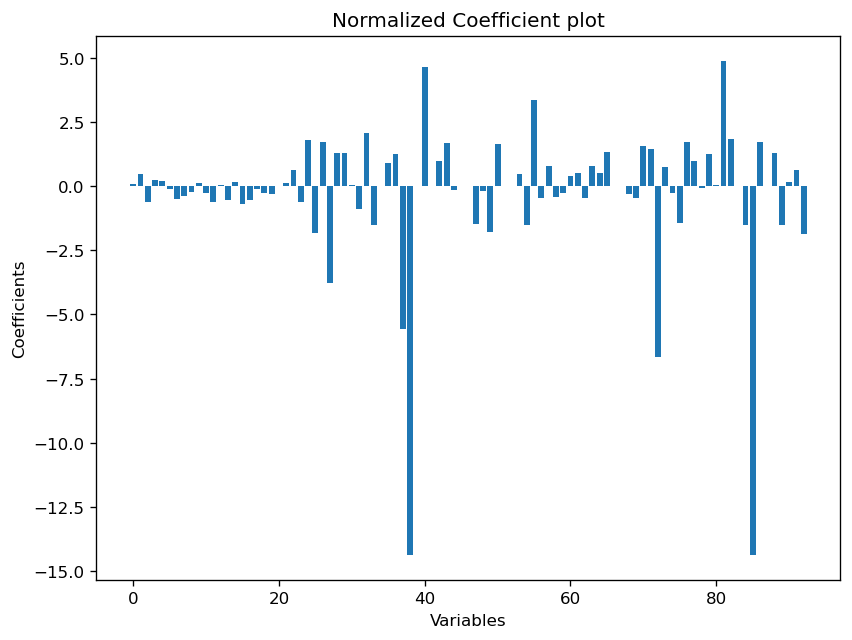

In [30]:
#Plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b') 
x = range(len(train_x.columns)) 
y = lr.coef_ 
plt.bar( x, y ) 
plt.xlabel( "Variables") 
plt.ylabel('Coefficients') 
plt.title('Normalized Coefficient plot')

In [34]:
#Creating a new subset of data
x = data.drop(['perc_mean'], axis=1)
y = data['perc_mean']
x.shape, y.shape

((44, 93), (44,))

In [35]:
#Arranging coefficients with features
Coefficients = pd.DataFrame({
    'Variable' : x.columns,
    'coefficient' : lr.coef_
})

Coefficients

,Variable,coefficient
0,Age,0.084748
1,Start_year,0.465834
2,End_year,-0.618004
3,Perc_1,0.228521
4,Perc_prev,0.208580
...,...,...
88,Learn_days_Wednesday;Friday,1.282836
89,Learn_days_Wednesday;Thursday;Friday,-1.504573
90,Preferred_studymode_Hybrid,0.173557
91,Preferred_studymode_Offline,0.636998


In [36]:
#Choosing variables with the significance greater than 0 (Filtering Significant feature)
sig_var = Coefficients[Coefficients.coefficient > 0]

In [37]:
#Extracting the significant subset do implement variables
subset = data[sig_var['Variable'].values]
subset.head()


,Age,Start_year,Perc_1,Perc_prev,Utilitarian_websites,Teacher_offline,Distracted_social_media,difference,inc/dec,Gender_Female,...,Learn_days_Saturday;Sunday,Learn_days_Sunday,Learn_days_Thursday;Friday,Learn_days_Thursday;Friday;Saturday,Learn_days_Tuesday,Learn_days_Tuesday;Friday,Learn_days_Tuesday;Wednesday;Thursday;Friday,Learn_days_Wednesday;Friday,Preferred_studymode_Hybrid,Preferred_studymode_Offline
0,20,2020,87.50,82.5,1,3,4,5.00,1,1,...,0,0,0,0,0,1,0,0,0,1
1,20,2019,80.01,89.0,5,4,4,-8.99,0,1,...,0,0,0,0,1,0,0,0,0,0
2,19,2020,82.00,81.0,3,3,5,1.00,1,1,...,0,0,0,0,0,0,0,0,1,0
3,21,2020,75.00,78.6,4,4,4,-3.60,0,1,...,0,0,0,0,0,0,0,0,0,1
4,23,2017,78.00,83.0,1,4,3,-5.00,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset,y,random_state = 56)

In [39]:
#Creating instance of Linear Regression with Normalized Data
lr = LR(normalize = True)

#Fitting the data
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [40]:
#Predicting over the test set and Calculating the error (mae)
test_predict = lr.predict(test_x)
lintest = mse(test_predict, test_y)
print('Training mean squared error',lintest)

Training mean squared error 6.914686327186297


Text(0.5, 1.0, 'Normalized Coefficient plot')

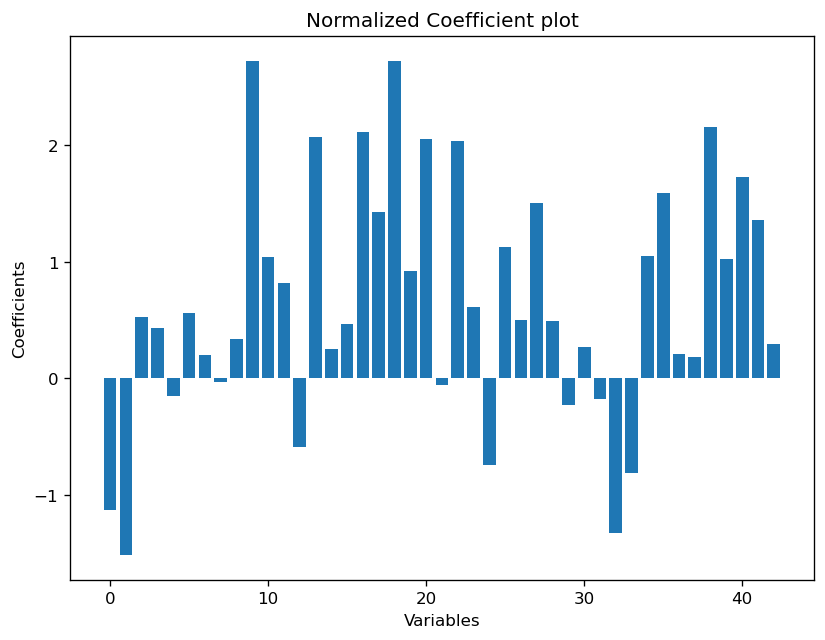

In [41]:
#Plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b') 
x = range(len(train_x.columns)) 
y = lr.coef_ 
plt.bar( x, y ) 
plt.xlabel( "Variables") 
plt.ylabel('Coefficients') 
plt.title('Normalized Coefficient plot')

In [42]:
test_predict = lr.predict(test_x)
test_predict[:10], lr.fit(train_x, train_y).score(test_x, test_y)

(array([67.28161088, 74.19615686, 86.23102589, 85.45406049, 65.75608373,
        73.15099294, 76.843016  , 80.51312454, 90.92782607, 74.63313658]),
 0.846921692160986)

In [45]:
#Arranging coefficients with features
Coefficients = pd.DataFrame({
    'Variable' : subset.columns,
    'coefficient' : lr.coef_
})

Coefficients

,Variable,coefficient
0,Age,-1.124748
1,Start_year,-1.514474
2,Perc_1,0.530880
3,Perc_prev,0.431654
4,Utilitarian_websites,-0.149984
5,Teacher_offline,0.565126
6,Distracted_social_media,0.201173
7,difference,-0.032553
8,inc/dec,0.338739
9,Gender_Female,2.718781
